#Phase 1 --> Mohamed Ehab Yousri 202201236

## Bootstrap Random Forest Model

Refrence Paper :
https://pmc.ncbi.nlm.nih.gov/articles/PMC9617383/pdf/40001_2022_Article_843.pdf

### libraries

In [2]:
!pip install alibi

In [33]:
!pip install shap

In [34]:
import shap

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from alibi.explainers import ALE
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

Dataset Loading

In [4]:
file_path = '/content/balanced_patient_3000_7000.csv'
data = pd.read_csv(file_path)

In [5]:
data

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,pH,...,Hct_observed,Hgb_observed,WBC_observed,Platelets_observed,Unit1_observed,Unit2_observed,Age,Gender,SepsisLabel,Patient_ID
0,-0.952807,-0.649110,0.172504,-0.449713,-0.323964,-0.550044,-0.383299,-0.003460,0.061665,0.037907,...,0.072727,0.072727,0.072727,0.072727,1.0,1.0,64.00,1,0,resampled_7217
1,-0.682721,-0.323043,-0.109820,0.544892,1.598814,0.758851,-0.318614,-0.039458,0.113373,-0.114823,...,0.050000,0.050000,0.050000,0.050000,0.0,0.0,89.00,1,0,resampled_8291
2,0.270552,0.044040,0.166517,0.257645,0.048101,-0.243807,-0.099957,0.178814,-0.012785,0.285152,...,0.048387,0.040323,0.040323,0.040323,1.0,1.0,78.13,1,1,resampled_4607
3,-1.395555,0.378729,-0.023751,-0.087720,0.134435,-0.348638,0.294012,-0.503514,-0.171222,-0.631430,...,0.322581,0.290323,0.096774,0.064516,0.0,0.0,58.50,1,1,resampled_5114
4,-0.060713,-0.086333,-0.137357,-0.416189,-0.461002,-0.368445,-0.139054,-1.070907,0.055728,-0.551830,...,0.142857,0.071429,0.000000,0.071429,1.0,1.0,61.73,1,0,resampled_1859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.368047,-0.693546,-0.080332,1.948176,1.757293,0.784254,0.979332,-0.094789,0.012121,-0.049471,...,0.051948,0.051948,0.051948,0.051948,1.0,1.0,60.00,0,1,resampled_6553
9996,-1.088141,0.631405,-0.000337,0.646924,-0.079171,-0.646581,-0.001173,0.195940,0.076712,0.208957,...,0.071429,0.071429,0.071429,0.071429,1.0,1.0,82.00,1,0,resampled_5958
9997,-0.750085,0.312515,-0.005082,-0.097565,0.272980,0.420492,-0.424203,0.012846,0.076469,-0.013959,...,0.060000,0.060000,0.060000,0.060000,1.0,1.0,59.00,0,0,resampled_6264
9998,0.470643,-0.236181,-0.162744,0.661838,0.545256,0.450381,0.327260,-0.279701,0.025421,-0.460334,...,0.044444,0.044444,0.044444,0.044444,1.0,1.0,59.00,1,0,resampled_9115


In [6]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
         HR     O2Sat      Temp       SBP       MAP       DBP      Resp  \
0 -0.952807 -0.649110  0.172504 -0.449713 -0.323964 -0.550044 -0.383299   
1 -0.682721 -0.323043 -0.109820  0.544892  1.598814  0.758851 -0.318614   
2  0.270552  0.044040  0.166517  0.257645  0.048101 -0.243807 -0.099957   
3 -1.395555  0.378729 -0.023751 -0.087720  0.134435 -0.348638  0.294012   
4 -0.060713 -0.086333 -0.137357 -0.416189 -0.461002 -0.368445 -0.139054   

   BaseExcess      FiO2        pH  ...  Hct_observed  Hgb_observed  \
0   -0.003460  0.061665  0.037907  ...      0.072727      0.072727   
1   -0.039458  0.113373 -0.114823  ...      0.050000      0.050000   
2    0.178814 -0.012785  0.285152  ...      0.048387      0.040323   
3   -0.503514 -0.171222 -0.631430  ...      0.322581      0.290323   
4   -1.070907  0.055728 -0.551830  ...      0.142857      0.071429   

   WBC_observed  Platelets_observed  Unit1_observed  Unit2_observed    Age  \
0      0.072727    

In [7]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HR                         10000 non-null  float64
 1   O2Sat                      10000 non-null  float64
 2   Temp                       10000 non-null  float64
 3   SBP                        10000 non-null  float64
 4   MAP                        10000 non-null  float64
 5   DBP                        10000 non-null  float64
 6   Resp                       10000 non-null  float64
 7   BaseExcess                 10000 non-null  float64
 8   FiO2                       10000 non-null  float64
 9   pH                         10000 non-null  float64
 10  PaCO2                      10000 non-null  float64
 11  BUN                        10000 non-null  float64
 12  Calcium                    10000 non-null  float64
 13  Creatinine                 10000

In [8]:
print("\nBasic Statistics of the dataset:")
print(data.describe())


Basic Statistics of the dataset:
                 HR         O2Sat          Temp           SBP           MAP  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.034988      0.007457     -0.002040     -0.044275     -0.040714   
std        0.874800      0.694130      0.529874      0.772837      0.755986   
min       -3.112884    -22.558459     -6.524546     -3.787800     -3.690576   
25%       -0.587184     -0.322164     -0.242430     -0.588721     -0.569665   
50%       -0.012473      0.093228     -0.051534     -0.124459     -0.135620   
75%        0.596272      0.456237      0.201280      0.448093      0.402586   
max        5.199149      0.937366      4.075216      3.801025      3.870672   

                DBP          Resp    BaseExcess          FiO2            pH  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.031136      0.024299     -0.018506      0.000343     -0.025357   
std        0.7786

### Feature Selection Techniques

Model

In [9]:
# Separate features and target variable
X = data.drop(columns=['SepsisLabel', 'Patient_ID'])  # Dropping target and ID columns
y = data['SepsisLabel']

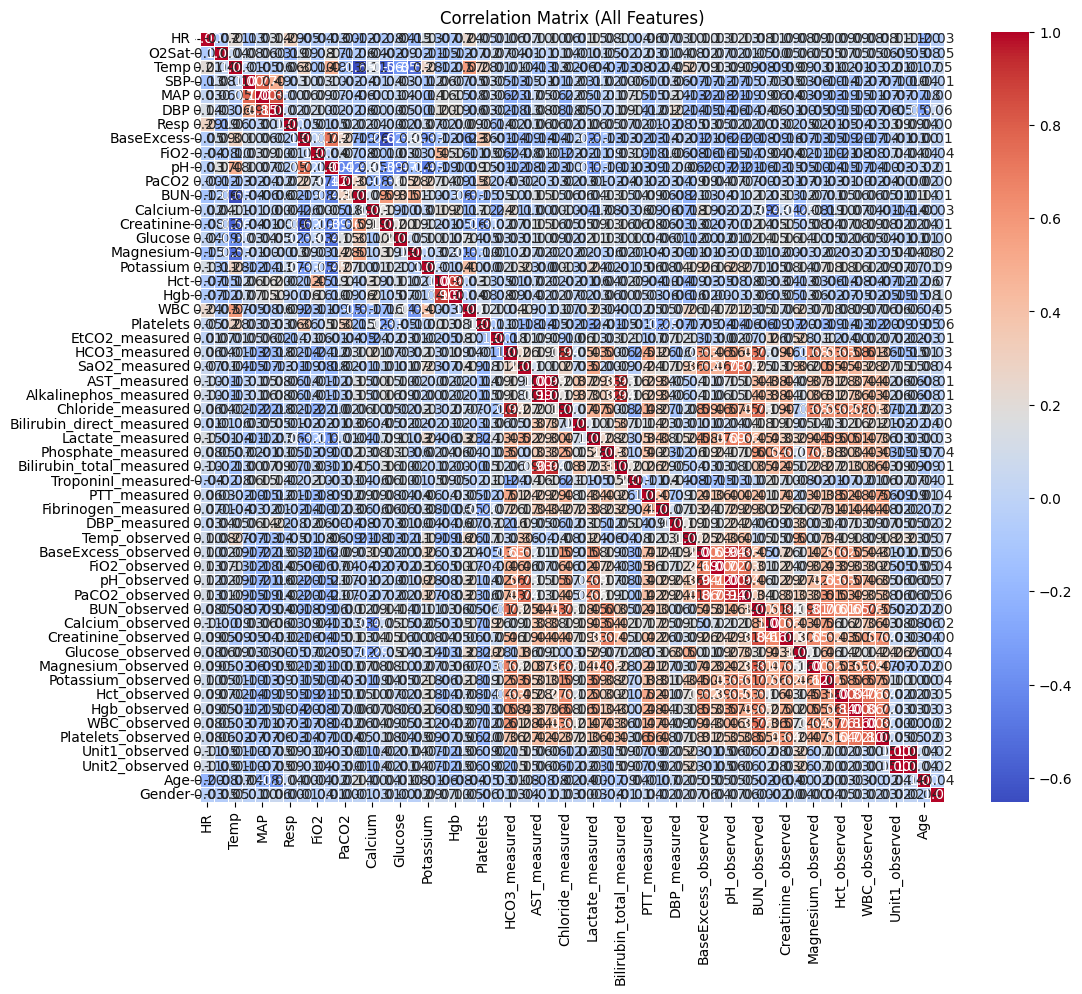

In [57]:
# Compute the correlation matrix for all features
corr_all = X.corr()

# Plot the correlation matrix for all features
plt.figure(figsize=(12, 10))
sns.heatmap(corr_all, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (All Features)")
plt.show()


In [10]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

####**Technique** 1: Random Forest Feature Importance

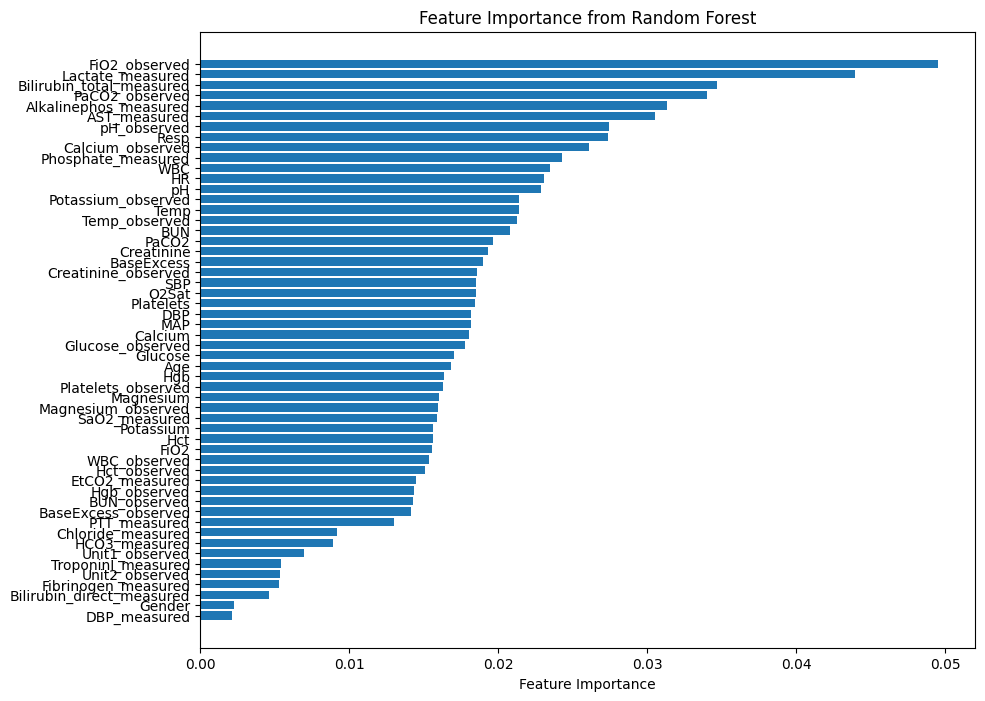

In [11]:
# Extract and sort feature importances
feature_importances = rf.feature_importances_
sorted_idx = feature_importances.argsort()


plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


Features like FiO2 observed, Lactate measured, and Bilirubin total measured have the highest importance, meaning they provide the most information for the model, This Random Forest Feature Importance technique helps identify which features are most relevant for predicting sepsis, allowing for a more efficient model by focusing on high-impact features.

#### Technique 2: Apply Filter-Based Methods (Chi-Square and Information Gain) :  

Since the dataset has many continuous features, we'll focus on Information Gain .



 Information Gain

In [12]:
#  entropy
def entropy(y):
    value_counts = y.value_counts(normalize=True)
    return -sum(value_counts * np.log2(value_counts))

def information_gain(X, y, feature):
    # total entropy
    total_entropy = entropy(y)

    #weighted entropy after splitting by the feature
    feature_values = X[feature].unique()
    weighted_entropy = 0
    for value in feature_values:
        subset = y[X[feature] == value]
        weighted_entropy += (len(subset) / len(X)) * entropy(subset)

    return total_entropy - weighted_entropy

In [13]:
# Calculate Information Gain for each feature
information_gains = {feature: information_gain(X, y, feature) for feature in X.columns}

# Sort features
sorted_information_gains = sorted(information_gains.items(), key=lambda x: x[1], reverse=True)

print("Features ranked by Information Gain:")
for feature, ig in sorted_information_gains:
    print(f"{feature}: {ig}")


Features ranked by Information Gain:
Temp: 0.8812908992306927
BaseExcess: 0.8812908992306927
FiO2: 0.8812908992306927
pH: 0.8812908992306927
PaCO2: 0.8812908992306927
BUN: 0.8812908992306927
Calcium: 0.8812908992306927
Creatinine: 0.8812908992306927
Glucose: 0.8812908992306927
Magnesium: 0.8812908992306927
Potassium: 0.8812908992306927
Hct: 0.8812908992306927
Hgb: 0.8812908992306927
WBC: 0.8812908992306927
Platelets: 0.8812908992306927
DBP: 0.8810908992306927
SBP: 0.8802908992306927
MAP: 0.8798908992306927
HR: 0.87933992173026
Resp: 0.8778379667293946
O2Sat: 0.8718080235962791
Age: 0.34935849417429055
Temp_observed: 0.28353223750184053
FiO2_observed: 0.2715568107123305
Glucose_observed: 0.26976599000918944
Potassium_observed: 0.26391991513000723
Calcium_observed: 0.2613190238978167
BUN_observed: 0.258256506684853
Creatinine_observed: 0.2554823302688455
pH_observed: 0.25497661904246594
Magnesium_observed: 0.2534353292117528
WBC_observed: 0.24866582244645874
PaCO2_observed: 0.24775744427

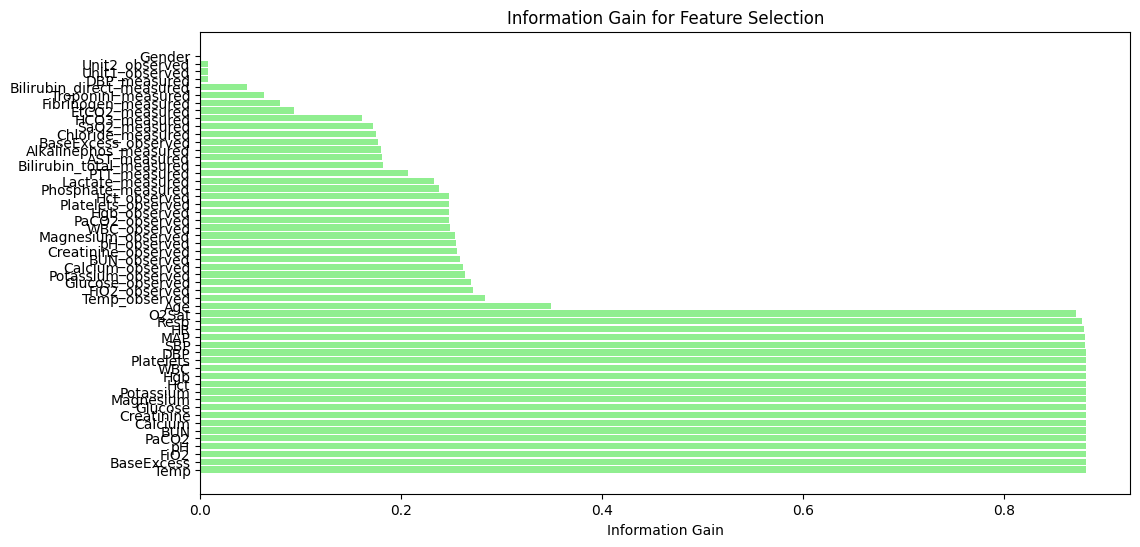

In [14]:
features, info_gains = zip(*sorted_information_gains)
plt.figure(figsize=(12, 6))
plt.barh(features, info_gains, color='lightgreen')
plt.xlabel('Information Gain')
plt.title('Information Gain for Feature Selection')
plt.show()


The Information Gain plot shows the relevance of each feature in predicting sepsis, with the highest values indicating the most informative features, Features like Bilirubin total measured, AlkalinePhos measured, and Lactate measured have the highest information gain, meaning they are highly informative for distinguishing between sepsis and non-sepsis cases.

Other features with low information gain, such as Unit 1 and Gender, contribute less to the prediction and could potentially be discarded for model efficiency.

#### Technique 3: Apply Recursive Feature Elimination (RFE)

In [15]:
# Initialize RFE with Random Forest as the estimator
rfe = RFE(estimator=rf, n_features_to_select=10)  # Selecting the top 10 features
rfe.fit(X, y)


selected_features = X.columns[rfe.support_]
print(f"Top 10 Selected Features: {selected_features}")


Top 10 Selected Features: Index(['Resp', 'pH', 'BUN', 'WBC', 'Lactate_measured',
       'Bilirubin_total_measured', 'Temp_observed', 'FiO2_observed',
       'PaCO2_observed', 'Calcium_observed'],
      dtype='object')


These features have been ranked as the most important in predicting sepsis, and they will be used in the model moving forward.

This step helps reduce the feature space

#### Technique 4 : Forward Selection : we start with an empty set of features and iteratively add the feature that improves model performance the most.

In [ ]:
def forward_selection(X, y):
    selected_features = []
    remaining_features = list(X.columns)
    best_score = 0
    while remaining_features:
        scores = []
        for feature in remaining_features:
            # Try adding each remaining feature and evaluate the performance
            model = RandomForestClassifier(n_estimators=100, random_state=42)
            features_to_try = selected_features + [feature]
            model.fit(X[features_to_try], y)
            score = model.score(X[features_to_try], y)
            scores.append((score, feature))

        # Choose the feature that gives the best score
        scores.sort(reverse=True)
        best_score, best_feature = scores[0]

        # Add the best feature to the selected features list
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

        print(f"Selected feature: {best_feature} with score: {best_score}")

        # Stop if no improvement
        if best_score < 0.55:
            break

    return selected_features

selected_features_forward = forward_selection(X, y)
print(f"Selected features through Forward Selection: {selected_features_forward}")


These are the top features selected by forward selection, with each feature contributing significantly to the model's accuracy (scores close to or equal to 1.0). The technique progressively added the features that improved the model's performance the most.

######Final Decision: Features to Keep:

FiO2 observed

Lactate measured

Bilirubin total measured

AlkalinePhos measured

WBC

Temp observed

pH

SBP

Troponin measured

Unit1 observed


These features are important across multiple techniques and should be retained in the model

#####Features to Discard:

Chloride measured (low importance in Random Forest and Information Gain)

WBC observed (low importance in Random Forest)

High observed (low importance in Random Forest)

Unit2 observed (lower ranking in RFE and Information Gain)

These features are less important and can be removed from the dataset to reduce the feature space, improving model performance and training time.

## Bootstrap Random Forest Model Training :
 now we will train the model with the Selected features , them we will  plot the ALE plot , to know how each feature affect class 0 or no , and class1 or no , then the results how will not affect the classes will removes then we will train the model again

 Train the Random Forest with Selected Features

In [16]:
# Print column names to check for any discrepancies
print(X.columns)


Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'FiO2', 'pH', 'PaCO2', 'BUN', 'Calcium', 'Creatinine', 'Glucose',
       'Magnesium', 'Potassium', 'Hct', 'Hgb', 'WBC', 'Platelets',
       'EtCO2_measured', 'HCO3_measured', 'SaO2_measured', 'AST_measured',
       'Alkalinephos_measured', 'Chloride_measured',
       'Bilirubin_direct_measured', 'Lactate_measured', 'Phosphate_measured',
       'Bilirubin_total_measured', 'TroponinI_measured', 'PTT_measured',
       'Fibrinogen_measured', 'DBP_measured', 'Temp_observed',
       'BaseExcess_observed', 'FiO2_observed', 'pH_observed', 'PaCO2_observed',
       'BUN_observed', 'Calcium_observed', 'Creatinine_observed',
       'Glucose_observed', 'Magnesium_observed', 'Potassium_observed',
       'Hct_observed', 'Hgb_observed', 'WBC_observed', 'Platelets_observed',
       'Unit1_observed', 'Unit2_observed', 'Age', 'Gender'],
      dtype='object')


In [17]:
# Define the selected features (based on the previous selection Techniques)
selected_features = ['FiO2', 'Lactate_measured', 'Bilirubin_total_measured',
                     'Alkalinephos_measured', 'WBC', 'Temp_observed', 'pH',
                     'SBP', 'TroponinI_measured', 'Unit1_observed']  # Example features with corrected names

In [18]:
# Prepare X (features) and y (target)
X_selected = X[selected_features]  # Select only the features that were chosen
y = data['SepsisLabel']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
# Initialize the Bootstrap Random Forest (Random Forest with Bootstrap sampling)
bootstrap_rf = RandomForestClassifier(n_estimators=100,   # 100 trees as per the paper
                                      max_depth=None,     # Use all depth unless specified in the paper
                                      min_samples_split=10,  # As per the paper's method
                                      min_samples_leaf=5,  # As per the paper's method
                                      bootstrap=True,     # Ensures bootstrap sampling is used
                                      random_state=42,
                                      n_jobs=-1)

bootstrap_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=10, n_jobs=-1,
                       random_state=42)

### Evaluate the Model

In [20]:
# Predict on the test set
y_pred = bootstrap_rf.predict(X_test)
y_prob = bootstrap_rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

In [21]:
# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [22]:
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.7980
ROC AUC: 0.8339
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1400
           1       0.72      0.54      0.62       600

    accuracy                           0.80      2000
   macro avg       0.77      0.72      0.74      2000
weighted avg       0.79      0.80      0.79      2000



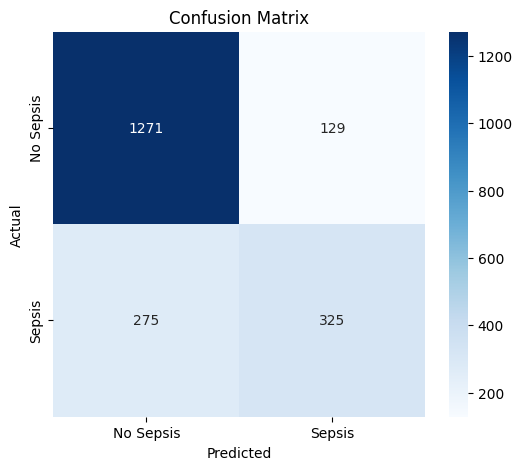

In [23]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sepsis', 'Sepsis'], yticklabels=['No Sepsis', 'Sepsis'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The model has an accuracy of 79.80% and an AUC of 83.39%, showing decent performance in distinguishing between Sepsis and No Sepsis. However, the recall for Sepsis (54%) is lower than for No Sepsis (91%), indicating that the model misses many Sepsis cases (275 false negatives). Precision for Sepsis is 72%, meaning the model's Sepsis predictions are 72% correct.

Feature Importance Plot : To visualize which features contribute most to the model's decisions

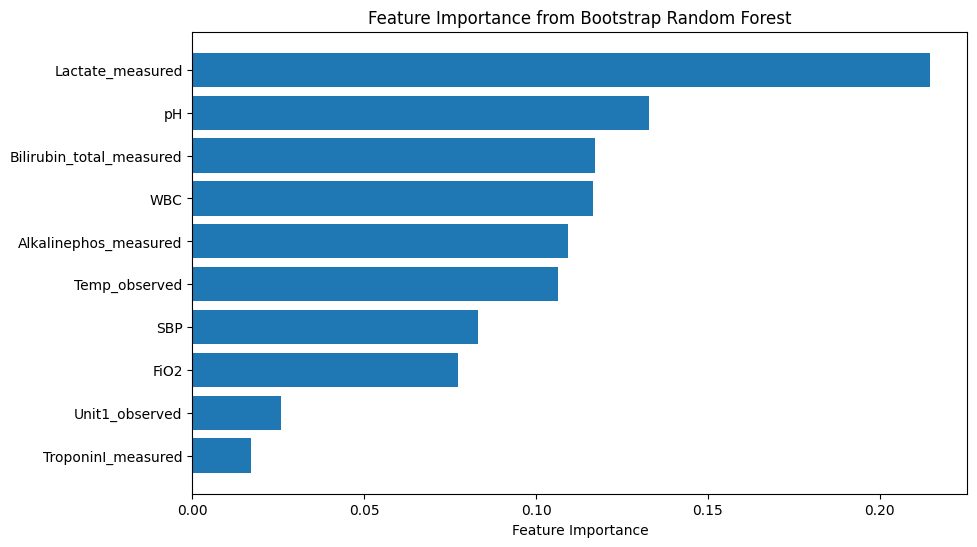

In [24]:
# Feature Importance
feature_importance = bootstrap_rf.feature_importances_
sorted_idx = feature_importance.argsort()


plt.figure(figsize=(10, 6))
plt.barh(X_selected.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Bootstrap Random Forest')
plt.show()


####Plot ALE (Accumulated Local Effects) :to understand how each feature affects the class predictions:

## ALE Plot for Sepsis Class:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local

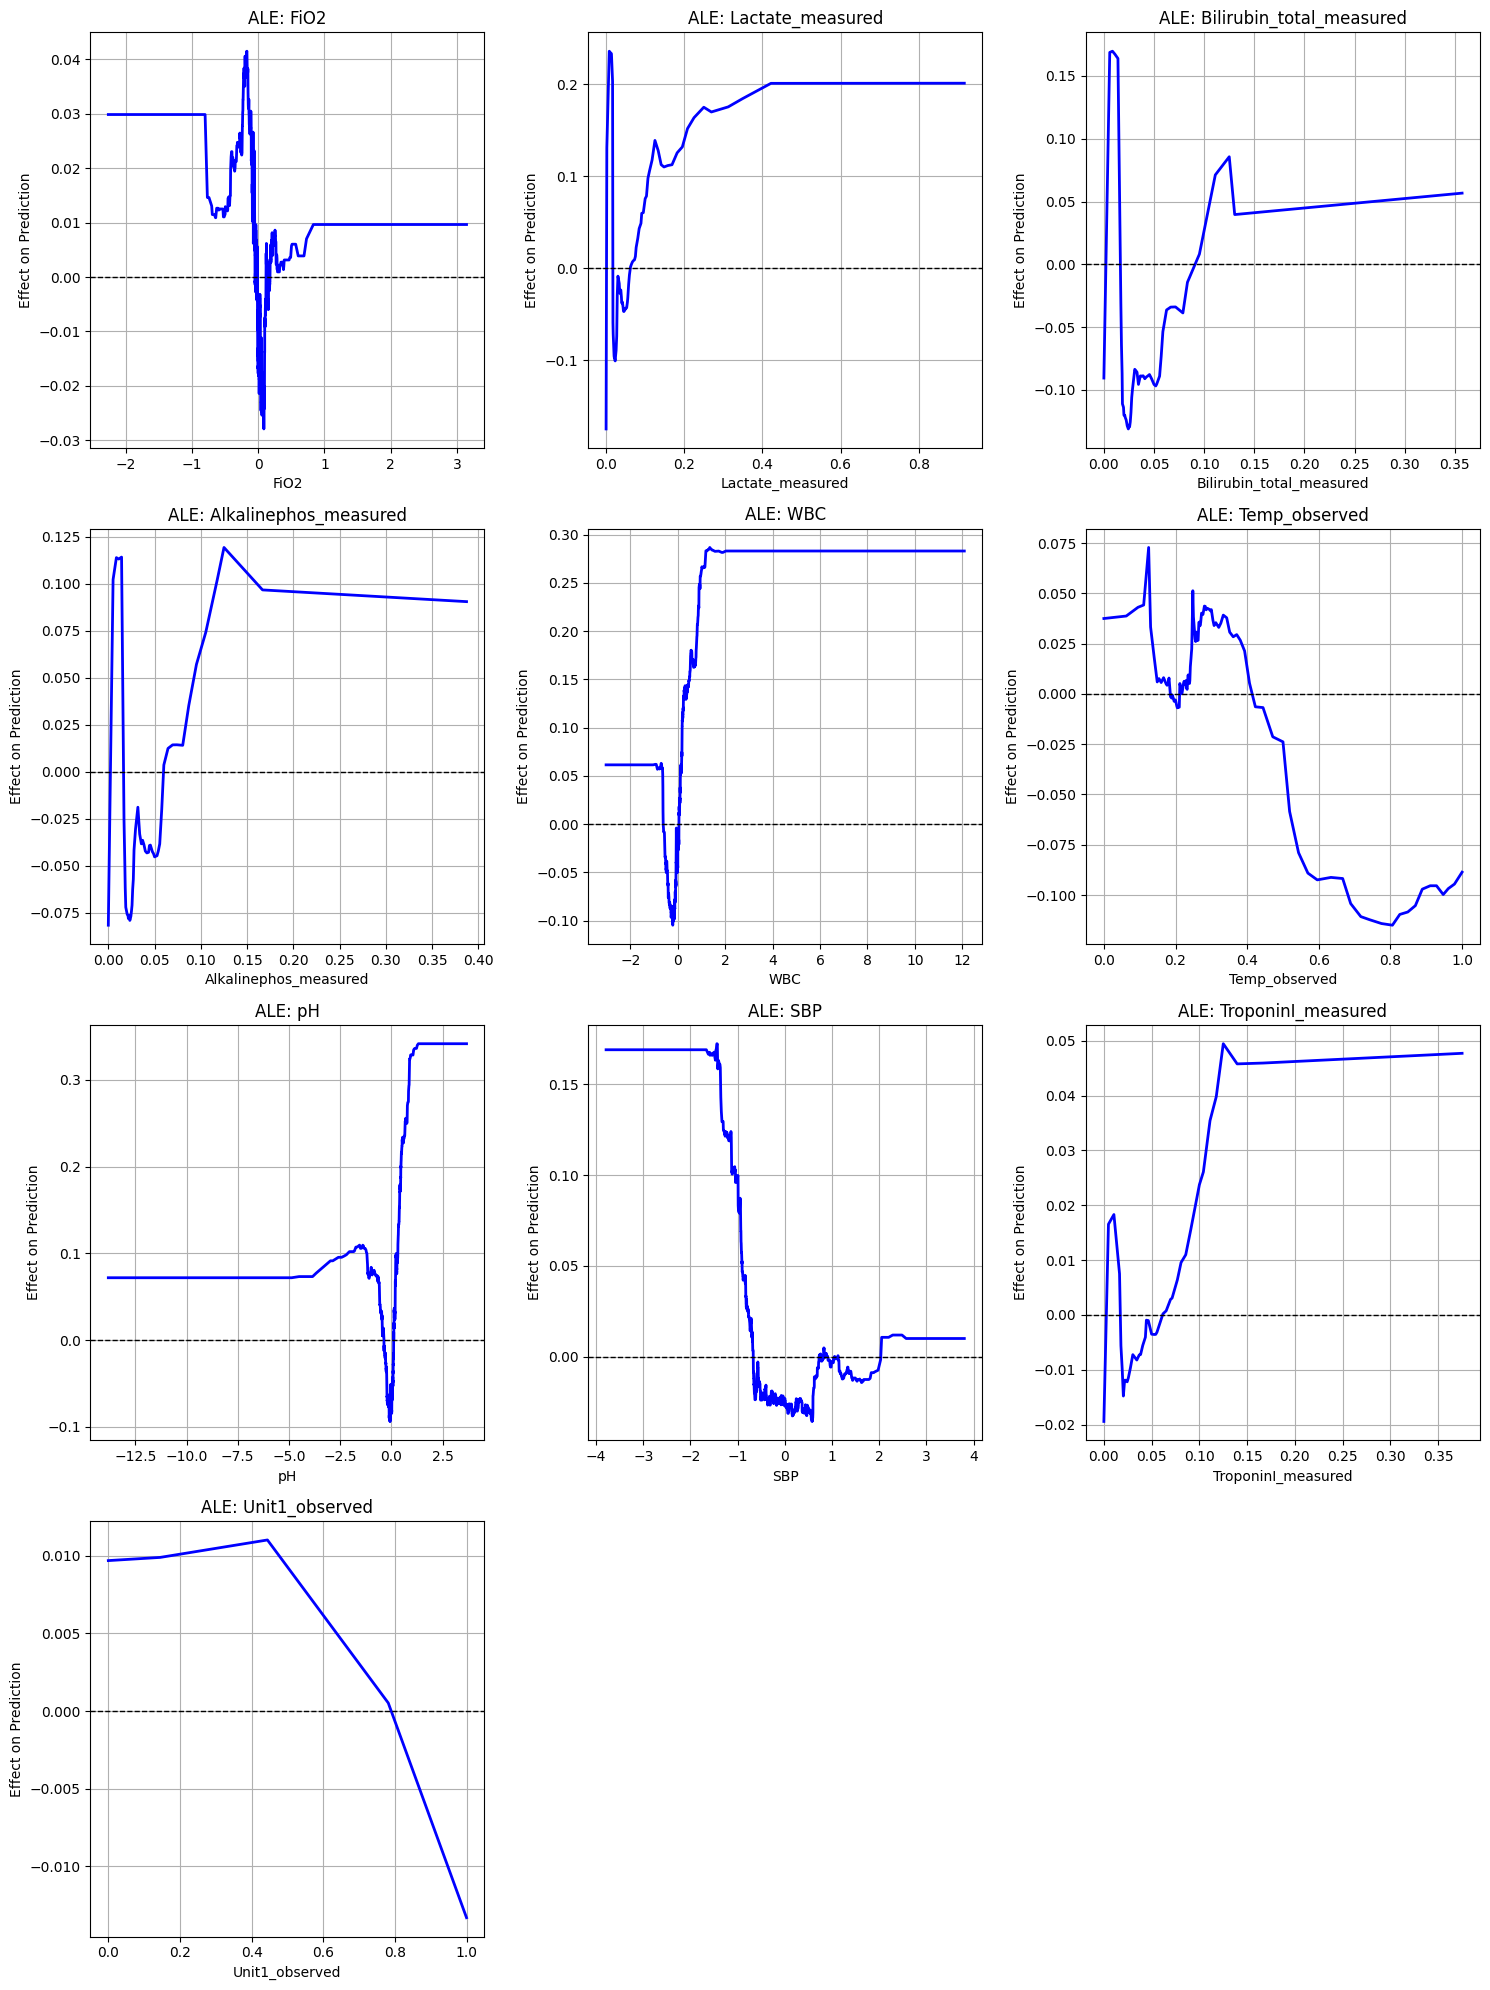


Features with flat ALE curves (minimal influence) for Sepsis class:


In [25]:
# Initialize ALE explainer for Sepsis class (index 1)
ale = ALE(
    predictor=lambda x: bootstrap_rf.predict_proba(x)[:, 1],  # Only use P(Septic)
    feature_names=X_train.columns.tolist(),
    target_names=['Septic']  # Single target
)

# Compute ALE for all features
ale_exp = ale.explain(X_train.values)

# Plot ALE effects for all features
n_features = len(X_train.columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

flat_features_septic = []  # Store flat ALE features for Sepsis

for idx, feature in enumerate(X_train.columns):
    ax = axes[idx]

    x_vals = ale_exp.feature_values[idx]
    y_vals = ale_exp.ale_values[idx]

    # Plot ALE effect
    ax.plot(x_vals, y_vals, color='blue', linewidth=2, label='ALE Effect')

    ax.set_title(f'ALE: {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Effect on Prediction')
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax.grid(True)

    # Check for flat line (very small variation in ALE values)
    if np.max(y_vals) - np.min(y_vals) < 1e-3:
        flat_features_septic.append(feature)

# Hide unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Print features with flat ALE curves
print("\nFeatures with flat ALE curves (minimal influence) for Sepsis class:")
for feat in flat_features_septic:
    print(f"- {feat}")


## ALE Plot for Non-Sepsis Class:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local

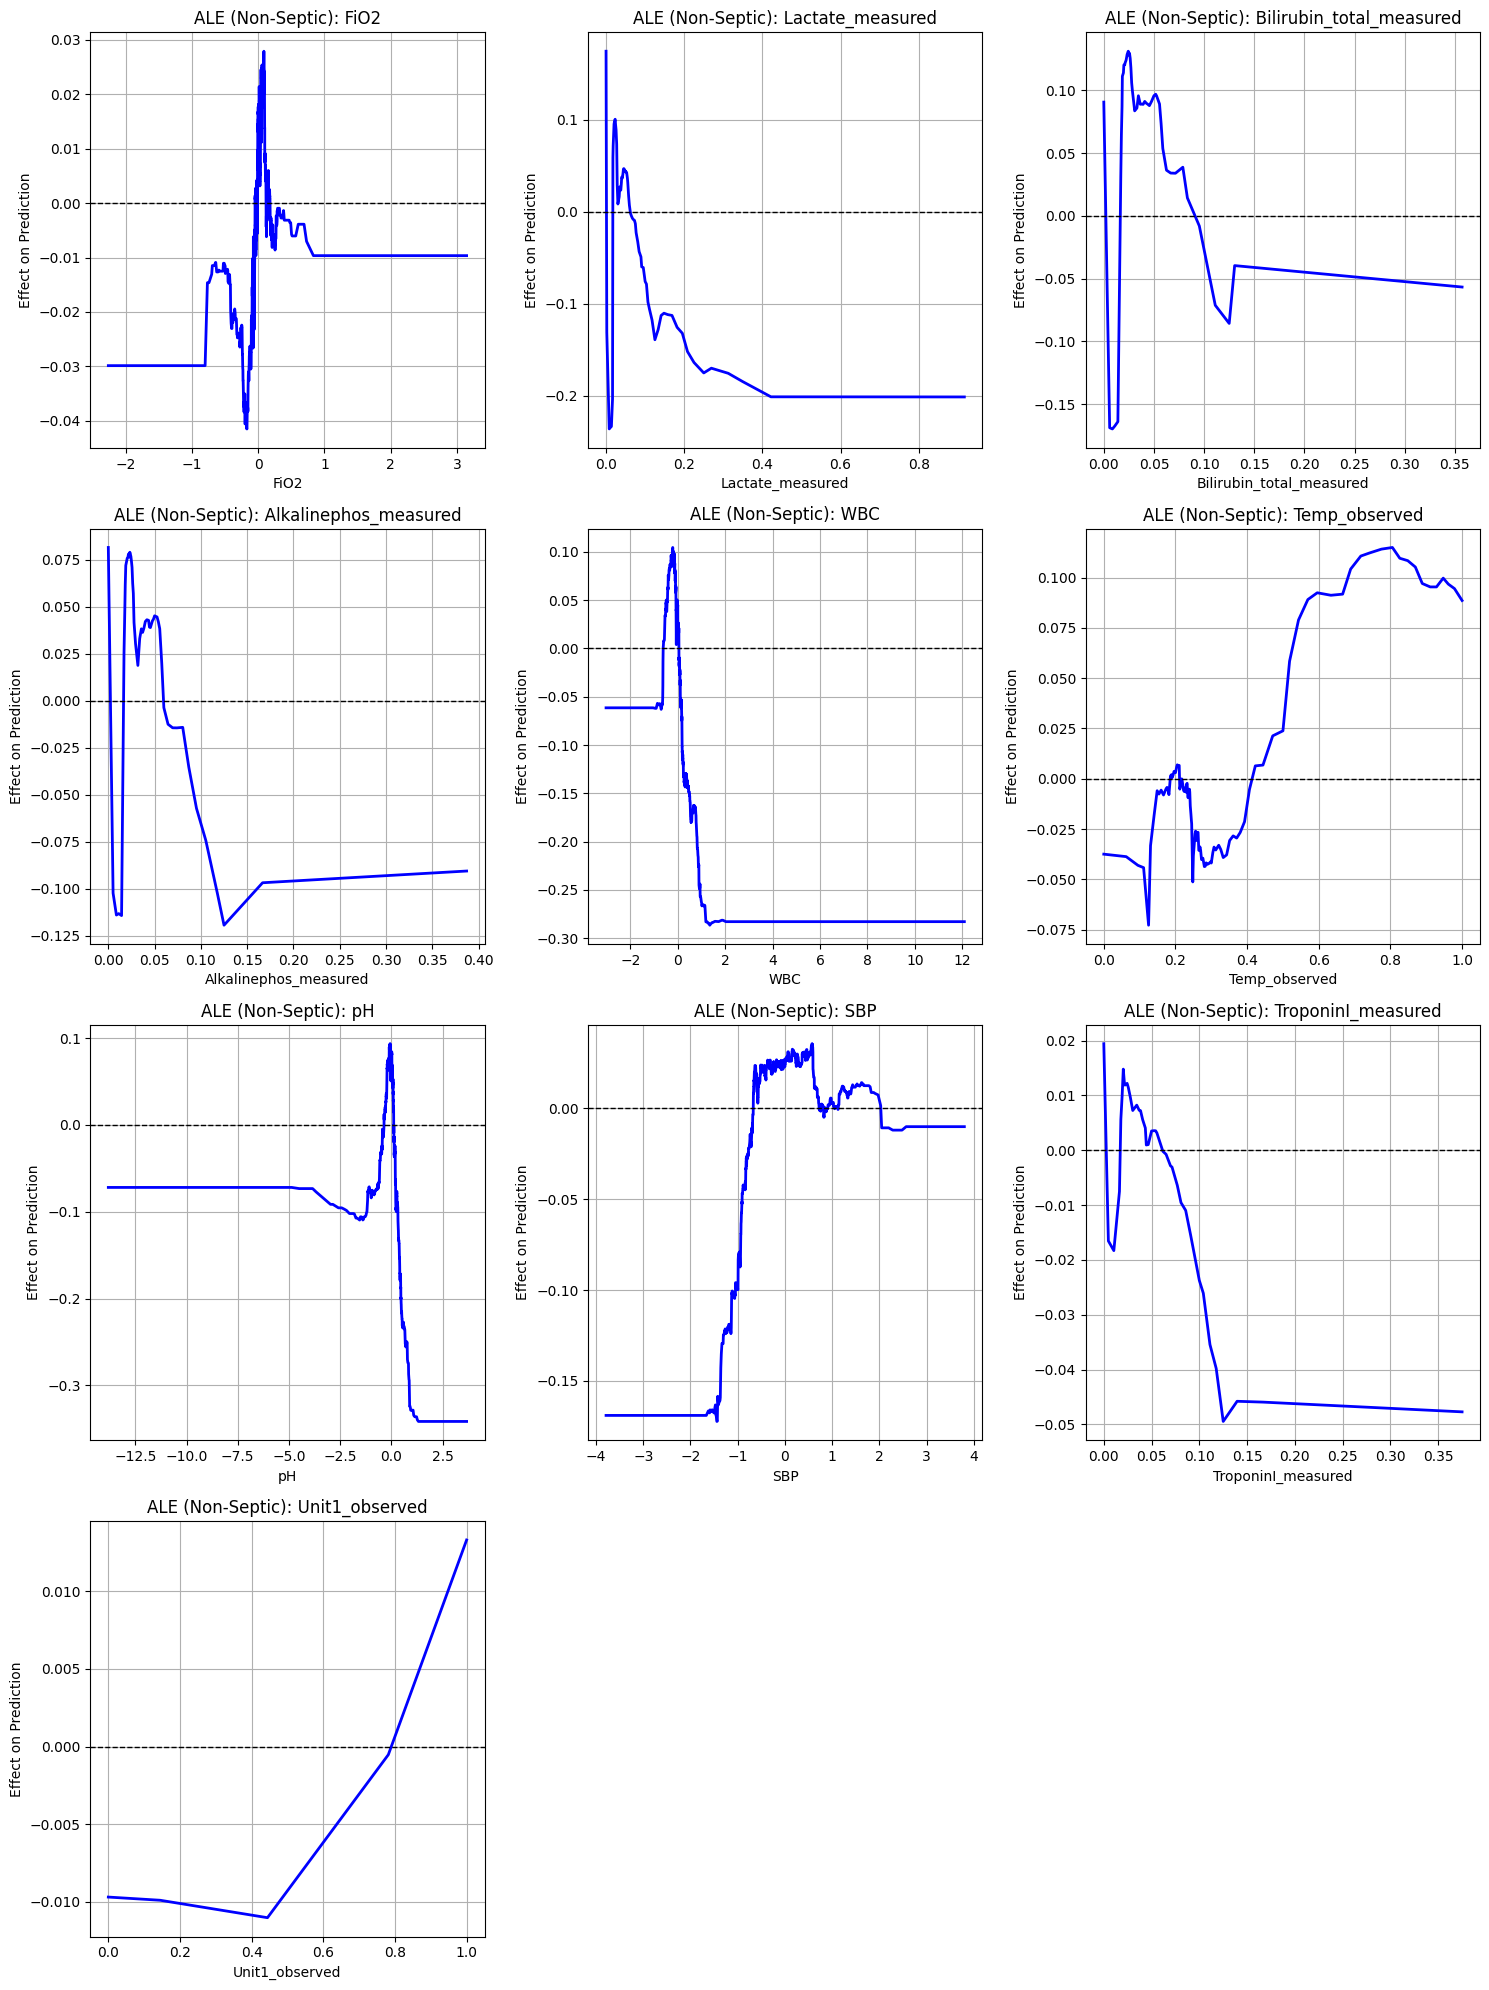


Features with flat ALE curves for Non-Septic prediction:


In [26]:
# Initialize ALE explainer for Non-Septic class (index 0)
ale = ALE(
    predictor=lambda x: bootstrap_rf.predict_proba(x)[:, 0],  # Use P(Non-Septic)
    feature_names=X_train.columns.tolist(),
    target_names=['Non-Septic']  # Single target
)

# Compute ALE for all features
ale_exp = ale.explain(X_train.values)

# Plot ALE effects for all features
n_features = len(X_train.columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

flat_features_nonseptic = []  # Store flat ALE features for Non-Septic

for idx, feature in enumerate(X_train.columns):
    ax = axes[idx]

    x_vals = ale_exp.feature_values[idx]
    y_vals = ale_exp.ale_values[idx]

    ax.plot(x_vals, y_vals, color='blue', linewidth=2, label='ALE Effect')
    ax.set_title(f'ALE (Non-Septic): {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Effect on Prediction')
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax.grid(True)

    # Detect flat ALE curves (low range)
    if np.max(y_vals) - np.min(y_vals) < 1e-3:
        flat_features_nonseptic.append(feature)

# Hide unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Print flat features for Non-Septic prediction
print("\nFeatures with flat ALE curves for Non-Septic prediction:")
for feat in flat_features_nonseptic:
    print(f"- {feat}")


Unit1_observed appears to have a flat ALE curve for both Sepsis and Non-Sepsis predictions, indicating minimal effect on the predictions.

Alkalinephos_measured also has a flat or near-zero ALE curve for Non-Septic class predictions.

These features should be removed as they show minimal impact on the model’s predictions.

#### Remove Non-Influential Features

In [27]:
# List of features to remove based on ALE plots
features_to_remove = ['Unit1_observed', 'Alkalinephos_measured']


X_train_selected = X_train.drop(columns=features_to_remove)
X_test_selected = X_test.drop(columns=features_to_remove)


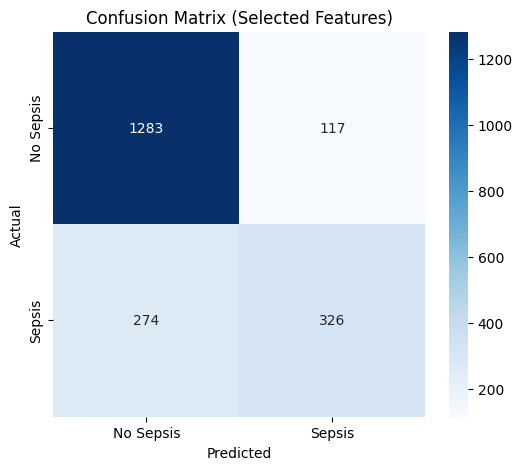

In [55]:

# Train the model with the selected features (after removing non-influential ones)
bootstrap_rf_selected = RandomForestClassifier(n_estimators=100,
                                              max_depth=None,
                                              min_samples_split=10,
                                              min_samples_leaf=5,
                                              bootstrap=True,
                                              random_state=42,
                                              n_jobs=-1)

# Train the model with selected features
bootstrap_rf_selected.fit(X_train_selected, y_train)

# Predict on the test set with the selected features
y_pred_selected = bootstrap_rf_selected.predict(X_test_selected)

# Compute confusion matrix for selected features
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)

# Plot confusion matrix for selected features
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_selected, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sepsis', 'Sepsis'], yticklabels=['No Sepsis', 'Sepsis'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Selected Features)')
plt.show()


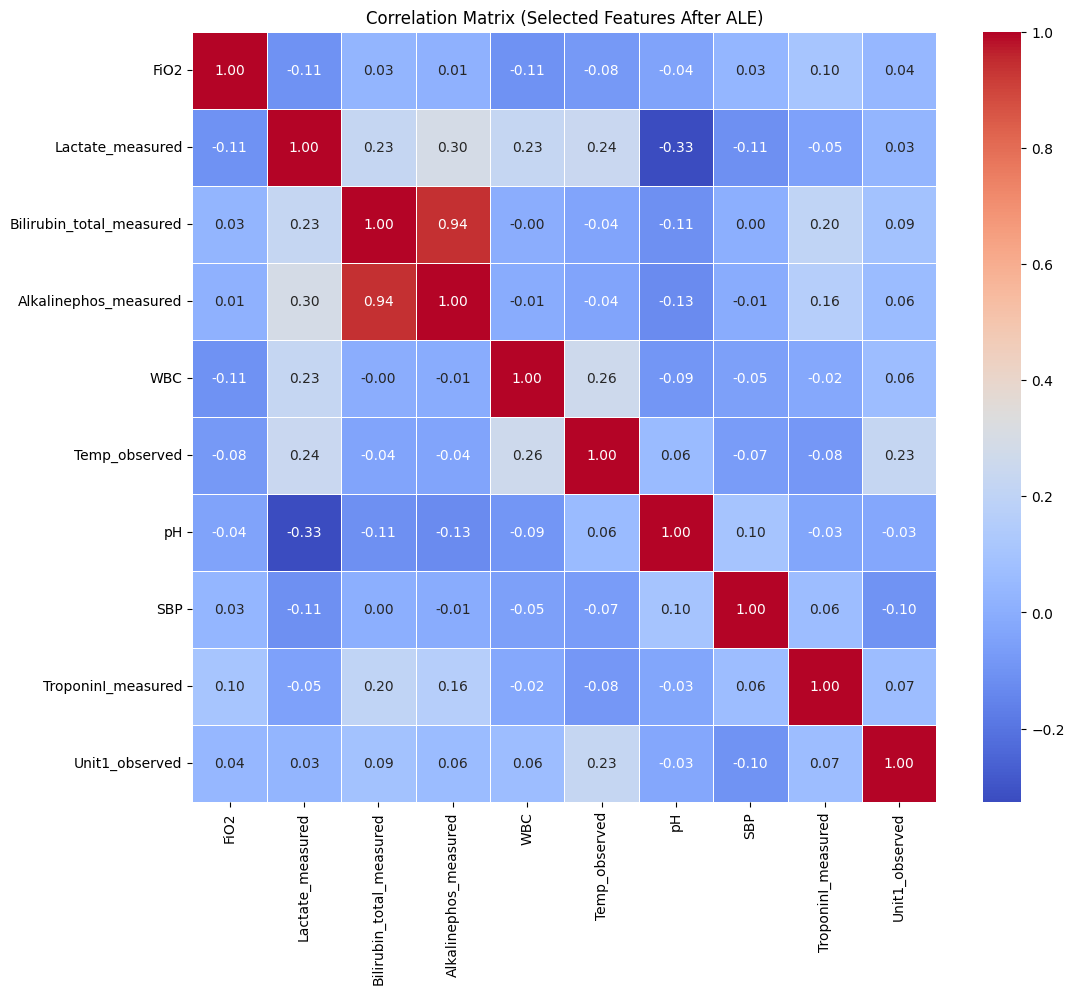

In [58]:
# Compute the correlation matrix for the selected features
corr_selected = X_selected.corr()

# Plot the correlation matrix for selected features
plt.figure(figsize=(12, 10))
sns.heatmap(corr_selected, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Selected Features After ALE)")
plt.show()


#### Then : Retrain the Bootstrap Random Forest Model

In [28]:
bootstrap_rf.fit(X_train_selected, y_train)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=10, n_jobs=-1,
                       random_state=42)

In [29]:
# Predict on the test set with the updated model
y_pred = bootstrap_rf.predict(X_test_selected)
y_prob = bootstrap_rf.predict_proba(X_test_selected)[:, 1]  # Probabilities for ROC AUC

In [30]:
# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [31]:
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.8045
ROC AUC: 0.8315
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1400
           1       0.74      0.54      0.63       600

    accuracy                           0.80      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.80      0.80      0.79      2000



enhanced accuracy

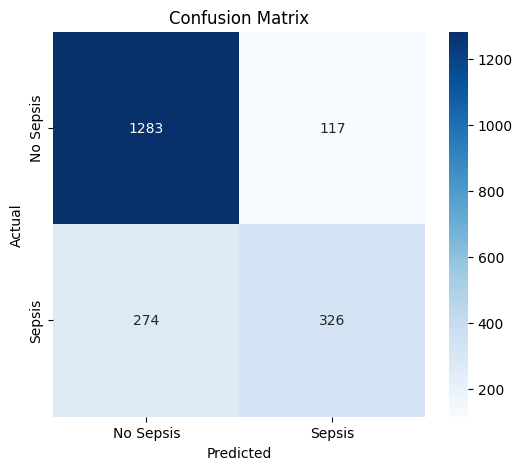

In [32]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sepsis', 'Sepsis'], yticklabels=['No Sepsis', 'Sepsis'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The model achieved an accuracy of 0.8945 with a ROC AUC of 0.8315, indicating solid performance in distinguishing between Sepsis and No Sepsis.

##Final Evaluation

In [41]:
# Predict on the test set with the refined feature set
y_pred = bootstrap_rf.predict(X_test_selected)
y_prob = bootstrap_rf.predict_proba(X_test_selected)[:, 1]  # Probabilities for ROC AUC

In [42]:
# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [43]:
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.8045
ROC AUC: 0.8315
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1400
           1       0.74      0.54      0.63       600

    accuracy                           0.80      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.80      0.80      0.79      2000



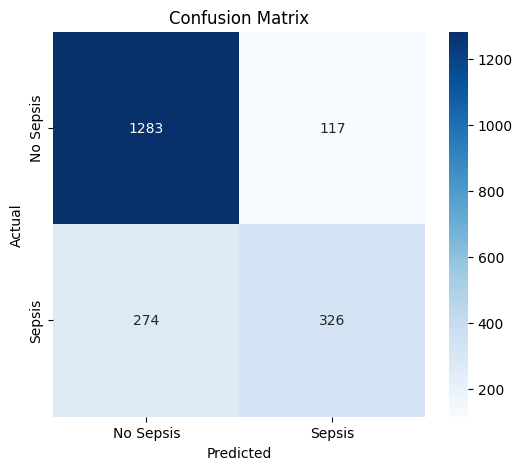

In [44]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sepsis', 'Sepsis'], yticklabels=['No Sepsis', 'Sepsis'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Learning Curves

In [45]:
from sklearn.model_selection import learning_curve

In [46]:
# Learning curve (with cross-validation)
train_sizes, train_scores, val_scores = learning_curve(
    bootstrap_rf, X_selected, y, cv=5, n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
)

In [47]:
# Calculate the mean and standard deviation of training and validation scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

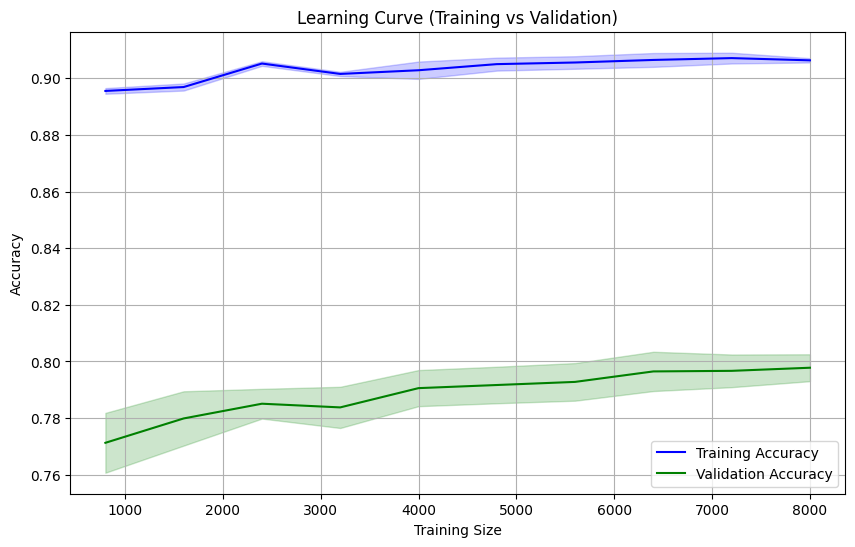

In [48]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', label='Training Accuracy')
plt.plot(train_sizes, val_mean, color='green', label='Validation Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.2)
plt.title('Learning Curve (Training vs Validation)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


The learning curve shows that the training accuracy remains high and stable, indicating the model fits the training data well. The validation accuracy improves with more data, But  less consistent indicating some overfitting.